In [1]:
# import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [2]:
import zipfile
with zipfile.ZipFile('../content/creditcard.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('../content/')

In [3]:
data=pd.read_csv('../content/creditcard.csv')

In [4]:
data.shape

(284807, 31)

In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
print(data.corr()["Class"].sort_values(ascending=False))

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64


0    284315
1       492
Name: Class, dtype: int64


/Users/vtejass/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


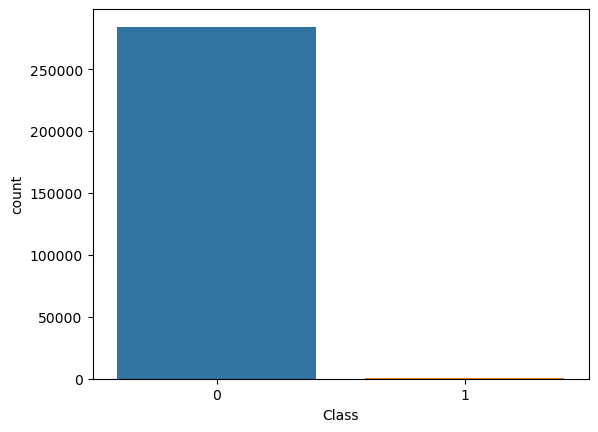

In [9]:
#Fradulent/ Non-Fradulent Samples Plot
y = data["Class"]
sns.countplot(y)
target_temp = data.Class.value_counts()
print(target_temp)

In [15]:
#Split the dataset into train and test set
from sklearn.model_selection import train_test_split

predictors = data.drop("Class",axis=1)
target = data["Class"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [16]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(227845, 30) (227845,) (56962, 30) (56962,)


In [17]:
#Random Forest
rf = RandomForestClassifier()
st=time.time()
rf.fit(X_train,Y_train)
et=time.time()
print("Training Time:",et-st)
Y_trainpred_rf=rf.predict(X_train)
print("Training Accuracy Score: {}".format(accuracy_score(Y_train,Y_trainpred_rf)))
st=time.time()
Y_pred_rf = rf.predict(X_test)
et=time.time()
print("Pred Time:",et-st)
print("Testing Accuracy Score: {}".format(accuracy_score(Y_test,Y_pred_rf)))
print('AUC Score: {}'.format(roc_auc_score(Y_test,Y_pred_rf,average='weighted')))
print(classification_report(Y_test,Y_pred_rf))

Training Time: 112.87781000137329
Training Accuracy Score: 1.0
Pred Time: 0.28926610946655273
Testing Accuracy Score: 0.9994908886626171
AUC Score: 0.891027555297694
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.92      0.78      0.84       101

    accuracy                           1.00     56962
   macro avg       0.96      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [18]:
#Decision Tree
dt = DecisionTreeClassifier()
st=time.time()
dt.fit(X_train,Y_train)
et=time.time()
print("Training Time:",et-st)
Y_trainpred_dt=dt.predict(X_train)
print("Training Accuracy Score: {}".format(accuracy_score(Y_train,Y_trainpred_dt)))
st=time.time()
Y_pred_dt = dt.predict(X_test)
et=time.time()
print("Pred Time:",et-st)
print("Testing Accuracy Score: {}".format(accuracy_score(Y_test,Y_pred_dt)))
print('AUC Score: {}'.format(roc_auc_score(Y_test,Y_pred_dt,average='weighted')))
print(classification_report(Y_test,Y_pred_dt))

Training Time: 9.911684036254883
Training Accuracy Score: 1.0
Pred Time: 0.0058100223541259766
Testing Accuracy Score: 0.9992977774656788
AUC Score: 0.9106976348960055
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.79      0.82      0.81       101

    accuracy                           1.00     56962
   macro avg       0.90      0.91      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [19]:
#LDA
lda = LinearDiscriminantAnalysis()
import time
st=time.time()
lda.fit(X_train,Y_train)
et=time.time()
print("Training Time:",et-st)
Y_trainpred_lda=lda.predict(X_train)
print("Training Accuracy Score: {}".format(accuracy_score(Y_train,Y_trainpred_lda)))
st=time.time()
Y_pred_lda = lda.predict(X_test)
et=time.time()
print("Pred Time:",et-st)
print("Testing Accuracy Score: {}".format(accuracy_score(Y_test,Y_pred_lda)))
print('AUC Score: {}'.format(roc_auc_score(Y_test,Y_pred_lda,average='weighted')))
print(classification_report(Y_test,Y_pred_lda))

Training Time: 0.4765901565551758
Training Accuracy Score: 0.9993899361407975
Pred Time: 0.0057599544525146484
Testing Accuracy Score: 0.999385555282469
AUC Score: 0.8810913917054286
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.88      0.76      0.81       101

    accuracy                           1.00     56962
   macro avg       0.94      0.88      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [20]:
#Logistic Regression
lr = LogisticRegression()
import time
st=time.time()
lr.fit(X_train,Y_train)
et=time.time()
print("Training Time:",et-st)
Y_trainpred_lr=lr.predict(X_train)
print("Training Accuracy Score: {}".format(accuracy_score(Y_train,Y_trainpred_lr)))
st=time.time()
Y_pred_lr = lr.predict(X_test)
et=time.time()
print("Pred Time:",et-st)
print("Testing Accuracy Score: {}".format(accuracy_score(Y_test,Y_pred_lr)))
print('AUC Score: {}'.format(roc_auc_score(Y_test,Y_pred_lr,average='weighted')))
print(classification_report(Y_test,Y_pred_lr))

Training Time: 2.4574241638183594
Training Accuracy Score: 0.9990168755074722
Pred Time: 0.039199113845825195
Testing Accuracy Score: 0.9989817773252344
AUC Score: 0.8364138290334899
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.73      0.67      0.70       101

    accuracy                           1.00     56962
   macro avg       0.87      0.84      0.85     56962
weighted avg       1.00      1.00      1.00     56962



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
#Naive Bayes Classifier
nb = GaussianNB()
import time
st=time.time()
nb.fit(X_train,Y_train)
et=time.time()
print("Training Time:",et-st)
Y_trainpred_nb=nb.predict(X_train)
print("Training Accuracy Score: {}".format(accuracy_score(Y_train,Y_trainpred_nb)))
st=time.time()
Y_pred_nb = nb.predict(X_test)
et=time.time()
print("Pred time:",et-st)
print("Testing Accuracy Score: {}".format(accuracy_score(Y_test,Y_pred_nb)))
print('AUC Score: {}'.format(roc_auc_score(Y_test,Y_pred_nb,average='weighted')))
print(classification_report(Y_test,Y_pred_nb))

Training Time: 0.07952690124511719
Training Accuracy Score: 0.9926046215629046
Pred time: 0.012418031692504883
Testing Accuracy Score: 0.9926091078262701
AUC Score: 0.8035716244634085
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56861
           1       0.14      0.61      0.23       101

    accuracy                           0.99     56962
   macro avg       0.57      0.80      0.61     56962
weighted avg       1.00      0.99      0.99     56962



In [22]:
#AdaBoost Classifier
abc = AdaBoostClassifier()
import time
st=time.time()
abc.fit(X_train,Y_train)
et=time.time()
print("Training Time:",et-st)
Y_trainpred_abc=abc.predict(X_train)
print("Training Accuracy Score: {}".format(accuracy_score(Y_train,Y_trainpred_abc)))
st=time.time()
Y_pred_abc = abc.predict(X_test)
et=time.time()
print("Pred time:",et-st)
print("Testing Accuracy Score: {}".format(accuracy_score(Y_test,Y_pred_abc)))
print('AUC Score: {}'.format(roc_auc_score(Y_test,Y_pred_abc,average='weighted')))
print(classification_report(Y_test,Y_pred_abc))

Training Time: 34.17127084732056
Training Accuracy Score: 0.99923632293884
Pred time: 0.14799094200134277
Testing Accuracy Score: 0.9992626663389628
AUC Score: 0.8711464347398493
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.82      0.74      0.78       101

    accuracy                           1.00     56962
   macro avg       0.91      0.87      0.89     56962
weighted avg       1.00      1.00      1.00     56962



In [23]:
#XGBoost Classifier
import xgboost
xgb = xgboost.XGBClassifier(objective="binary:logistic")
import time
st=time.time()
xgb.fit(X_train,Y_train)
et=time.time()
print("Training Time:",et-st)
Y_trainpred_xgb=xgb.predict(X_train)
print("Training Accuracy Score: {}".format(accuracy_score(Y_train,Y_trainpred_xgb)))
st=time.time()
Y_pred_xgb = xgb.predict(X_test)
et=time.time()
print("Pred time:",et-st)
print("Testing Accuracy Score: {}".format(accuracy_score(Y_test,Y_pred_xgb)))
print('AUC Score: {}'.format(roc_auc_score(Y_test,Y_pred_xgb,average='weighted')))
print(classification_report(Y_test,Y_pred_xgb))

Training Time: 11.800661087036133
Training Accuracy Score: 1.0
Pred time: 0.031805992126464844
Testing Accuracy Score: 0.9996137776061234
AUC Score: 0.9157976172918464
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.94      0.83      0.88       101

    accuracy                           1.00     56962
   macro avg       0.97      0.92      0.94     56962
weighted avg       1.00      1.00      1.00     56962

